## All imports line below this

In [50]:
## AI 
from fastai import *
from fastai.vision.all import *

## Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Image Processing
from fastai.data.external import *
from PIL import Image 

## Pull Data In

In [51]:
training_df = pd.read_csv("data/training.csv")

# training_df.head(1)

In [52]:
lookup_df = pd.read_csv("data/IdLookupTable.csv")

# lookup_df.head(1)

## Fix up the data a lil

In [53]:
training_df.fillna(method = 'ffill',inplace = True)

## Show an Image

In [54]:


def get_image_arr(index): 
    img_str = training_df['Image'][index]
    arr = np.fromstring(img_str, dtype=int, sep=' ')
    return arr 

def get_key_points(index, num=30):
    coord_arr = []
    for i in range(0,num,2):
        coord = training_df.iloc[0][i],training_df.iloc[0][i+1]
        coord_arr.append(coord)
    return coord_arr
    
def plot_image_with_key_points(index, num_key_points=30):
    arr = get_image_arr(index)
    coord_arr = get_key_points(index, num_key_points)
    
    
    plt.imshow(arr.reshape(96,96),cmap='gray')
    for coord in coord_arr:
        plt.scatter(coord[0],coord[1],c='b', marker='s', s=50, alpha=.5)
    

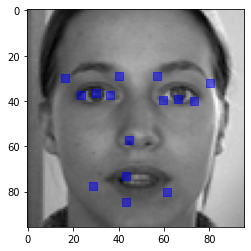

In [55]:
plot_image_with_key_points(12)

In [56]:
key_points = get_key_points(1)

type(key_points)

list

In [57]:
dblk = DataBlock(
    blocks=(ImageBlock, PointBlock),

)